# <center><font color='blue'>EDA for Dataset 2 (step 1-6)</font></center>

## <font color='red'>Step 1: import library</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color='red'>Step 2: load and understand dataset</font>

In [2]:
# Load dataset
data = pd.read_csv("../data/stroke.csv")

### <font color='blue'>- head</font>

In [3]:
# Display first 5 rows
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### <font color='blue'>- checking shape of dataframe</font>

In [4]:
# Check number of rows & columns
data.shape

(5110, 12)

### <font color='blue'>- checking info of dataframe</font>

In [5]:
# Check column types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### <font color='blue'>- check unique values in variable</font>

In [6]:
# Check unique values for each column
def unique_value():
    # Create a list of dictionaries for each column's info
    unique_data = []
    
    for col in data.columns:
        unique_values = data[col].unique()
        missing_count = data[col].isna().sum()
        
        unique_data.append({
            'Column': col,
            'Unique_Count': len(unique_values),
            'Missing_Values': missing_count,
            'Unique_Values': unique_values,
            'Data_Type': data[col].dtype
        })
    
    # Convert to DataFrame and return specified columns
    return pd.DataFrame(unique_data)[['Column', 'Unique_Count', 'Missing_Values', 'Data_Type', 'Unique_Values']]

result = unique_value()
result

,Column,Unique_Count,Missing_Values,Data_Type,Unique_Values
0,id,5110,0,int64,"[9046, 51676, 31112, 60182, 1665, 56669, 53882..."
1,gender,3,0,object,"[Male, Female, Other]"
2,age,104,0,float64,"[67.0, 61.0, 80.0, 49.0, 79.0, 81.0, 74.0, 69...."
3,hypertension,2,0,int64,"[0, 1]"
4,heart_disease,2,0,int64,"[1, 0]"
5,ever_married,2,0,object,"[Yes, No]"
6,work_type,5,0,object,"[Private, Self-employed, Govt_job, children, N..."
7,Residence_type,2,0,object,"[Urban, Rural]"
8,avg_glucose_level,3979,0,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2..."
9,bmi,419,201,float64,"[36.6, nan, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8..."


### <font color='blue'>- describe dataframe</font>

In [7]:
# Summary statistics for numeric features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### <font color='blue'>- use histogram to understand each variable</font>

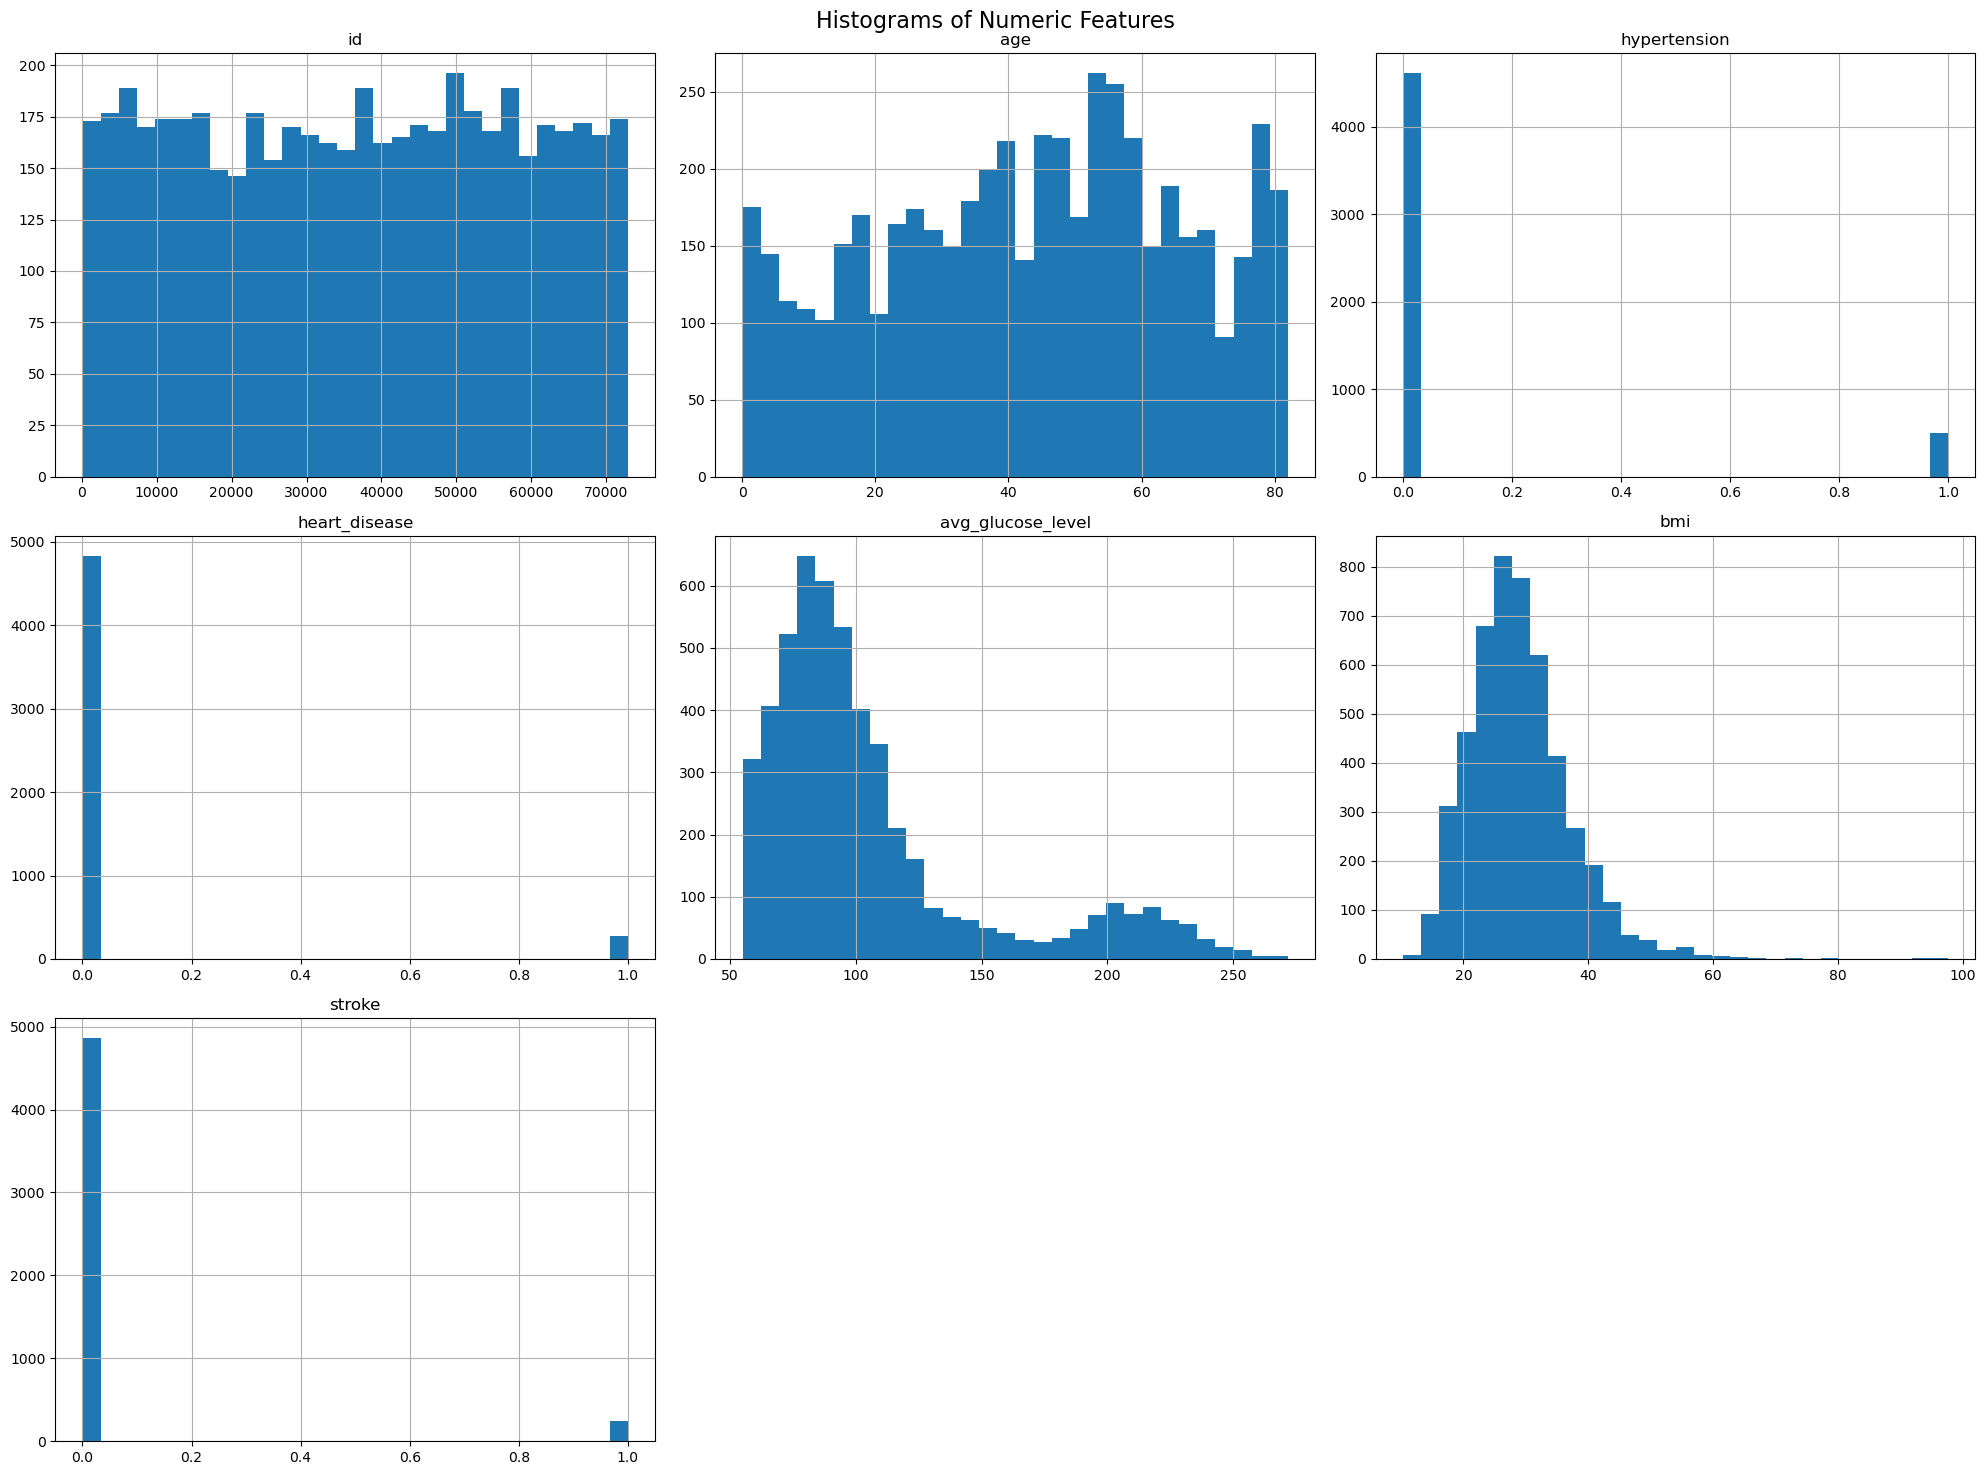

In [8]:
# 1. Plot histograms for numeric columns
data.select_dtypes(include='number').hist(figsize=(20, 15), bins=30)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

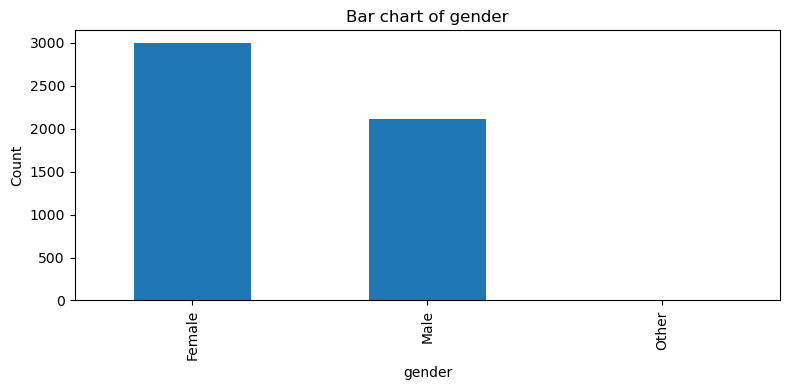

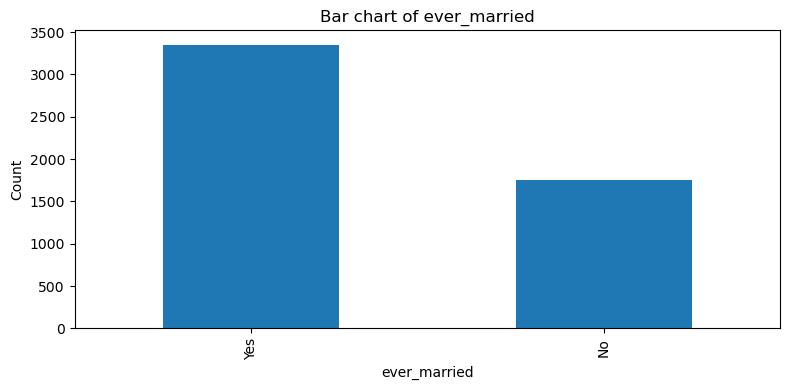

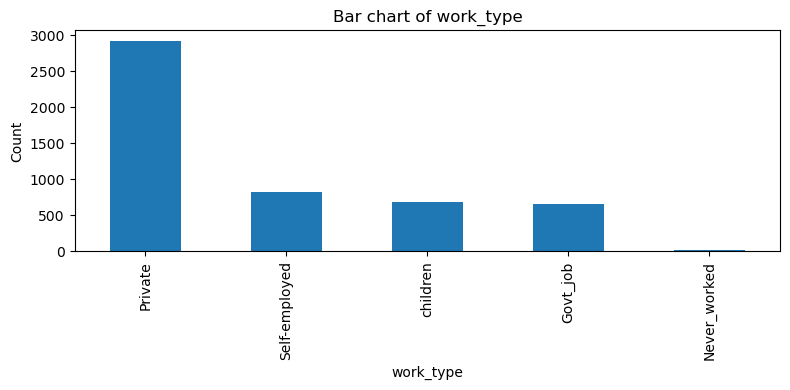

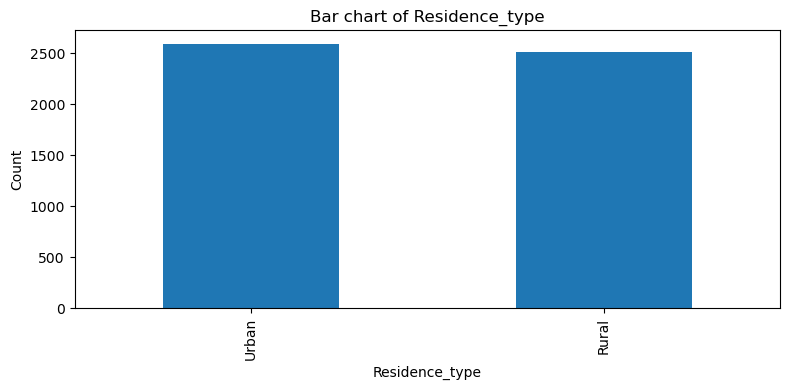

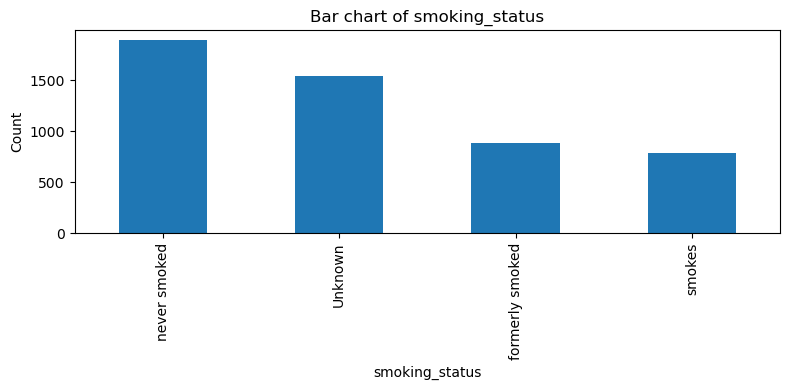

In [9]:
# 2. Plot bar charts for categorical columns
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

## <font color='red'>Step 3: data reduction</font>

In [10]:
# remove id because because not important to the current analysis compared to other attributes
data = data.drop(['id'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
# check the gender counts as it contains other
data["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

### <font color='blue'>- drop the rows for gender equals to "other"</font>

In [12]:
# Filter the dataset to keep only Male and Female entries
data = data[data["gender"].isin(["Male", "Female"])]

#confirm change
data["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

## <font color='red'>Step 4: data cleaning/ wrangling</font>

### <font color='blue'>- handle data quality issues</font>

In [13]:
# check each attribute value is consistent
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


### <font color='blue'>- convert age</font>

In [14]:
# convert age to integer data type
data["age"] = data["age"].astype("int64")

print(data.dtypes)

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


### <font color='blue'>- convert smoking status</font>

In [15]:
# Combine similar smoking categories for clearer analysis
data["smoking_status"] = data["smoking_status"].replace({
    "formerly smoked": "Smoker",
    "smokes": "Smoker",
    "never smoked": "Non-Smoker",
    # "Unknown": "Non-Smoker"
})

### <font color='blue'>- convert work type</font>

In [16]:
# Standardize and rename categories in the 'work_type' column for consistency and readability
data["work_type"] = data["work_type"].replace({
    "children": "Children",
    "Govt_job": "Government",
    "Never_worked": "Unemployed",
})

### <font color='blue'>- handle missing value

In [17]:
# Check for sum of missing values for each columns
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
# Fill missing BMI values with the median and round to 2 deimal place
data["bmi"] = data["bmi"].fillna(data["bmi"].median())
data["bmi"] = data["bmi"].round(2)

### <font color='blue'>- handle duplicate rows (no duplicates)</font>

In [19]:
# Check all duplicates including the first occurrence
duplicates_all = data[data.duplicated(keep=False)]
print("Duplicate Rows (including all occurrences):", len(duplicates_all))
print(duplicates_all.head())

# Show only the duplicates (excluding the first occurrence of each group)
duplicates = data[data.duplicated(keep='first')]
print("Duplicate Rows (excluding first occurrence):", len(duplicates))
print(duplicates.head())

Duplicate Rows (including all occurrences): 0
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
Duplicate Rows (excluding first occurrence): 0
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


### <font color='blue'>- ensure values in possible range</font>

In [20]:
#check if bmi is numeric and in possible range

data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')

invalid_data = data[(data['bmi'] < 0)]
print(invalid_data[['bmi']])

Empty DataFrame
Columns: [bmi]
Index: []


In [21]:
#check if age is numeric and in possible range

data['age'] = pd.to_numeric(data['age'], errors='coerce')

invalid_data = data[(data['age'] < 0)]
print(invalid_data[['age']])

Empty DataFrame
Columns: [age]
Index: []


In [22]:
#check if average glucose level is numeric and in possible range

data['avg_glucose_level'] = pd.to_numeric(data['avg_glucose_level'], errors='coerce')

invalid_data = data[(data['avg_glucose_level'] < 0)]
print(invalid_data[['avg_glucose_level']])

Empty DataFrame
Columns: [avg_glucose_level]
Index: []


### <font color='blue'>rename columns </font>

In [23]:
# Rename columns to same style for clarity
data = data.rename(columns={
    'Residence_type':     'residence_type',
})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 479.0+ KB


### <font color='blue'>convert datatype</font>

#### -map binary flag (0/1) to Yes/No category
#### -convert "object" data type to "category" data type

In [24]:
# List of binary features to convert from 0/1 into readable category labels
binary_cols = [
    'hypertension','heart_disease', 'stroke'
]

for col in binary_cols:
    # Map 0 → 'No' and 1 → 'Yes', and convert to categorical type
    data[col] = data[col].map({0: 'No', 1: 'Yes'}).astype('category')

# List of categorical features to convert to category data type
cat_cols = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in cat_cols:
    # Convert each column to categorical type
    data[col] = data[col].astype('category')
    
# Display unique values in each column to confirm the change
result = unique_value()
result

,Column,Unique_Count,Missing_Values,Data_Type,Unique_Values
0,gender,2,0,category,"['Male', 'Female'] Categories (2, object): ['F..."
1,age,83,0,int64,"[67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 5..."
2,hypertension,2,0,category,"['No', 'Yes'] Categories (2, object): ['No', '..."
3,heart_disease,2,0,category,"['Yes', 'No'] Categories (2, object): ['No', '..."
4,ever_married,2,0,category,"['Yes', 'No'] Categories (2, object): ['No', '..."
5,work_type,5,0,category,"['Private', 'Self-employed', 'Government', 'Ch..."
6,residence_type,2,0,category,"['Urban', 'Rural'] Categories (2, object): ['R..."
7,avg_glucose_level,3978,0,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2..."
8,bmi,418,0,float64,"[36.6, 28.1, 32.5, 34.4, 24.0, 29.0, 27.4, 22...."
9,smoking_status,3,0,category,"['Smoker', 'Non-Smoker', 'Unknown'] Categories..."


### <font color='blue'>- check data after clean</font>

In [25]:
# Check final number of rows & columns after cleaning
data.shape

(5109, 11)

In [26]:
result = unique_value()
result

,Column,Unique_Count,Missing_Values,Data_Type,Unique_Values
0,gender,2,0,category,"['Male', 'Female'] Categories (2, object): ['F..."
1,age,83,0,int64,"[67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 5..."
2,hypertension,2,0,category,"['No', 'Yes'] Categories (2, object): ['No', '..."
3,heart_disease,2,0,category,"['Yes', 'No'] Categories (2, object): ['No', '..."
4,ever_married,2,0,category,"['Yes', 'No'] Categories (2, object): ['No', '..."
5,work_type,5,0,category,"['Private', 'Self-employed', 'Government', 'Ch..."
6,residence_type,2,0,category,"['Urban', 'Rural'] Categories (2, object): ['R..."
7,avg_glucose_level,3978,0,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2..."
8,bmi,418,0,float64,"[36.6, 28.1, 32.5, 34.4, 24.0, 29.0, 27.4, 22...."
9,smoking_status,3,0,category,"['Smoker', 'Non-Smoker', 'Unknown'] Categories..."


## <font color='red'>Step 5: feature engineering</font>

### <font color='blue'>- derive new data</font>

In [27]:
# bmi category
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,Smoker,Yes,Obese
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.1,Non-Smoker,Yes,Overweight
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,Non-Smoker,Yes,Obese
3,Female,49,No,No,Yes,Private,Urban,171.23,34.4,Smoker,Yes,Obese
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,Non-Smoker,Yes,Normal


In [28]:
# diabetes category
bins = [0, 140, 200, 300]
labels = ['Normal','Prediabetic','Diabetic']
data['diabetes_category'] = pd.cut(data['avg_glucose_level'], bins=bins, labels=labels)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,diabetes_category
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,Smoker,Yes,Obese,Diabetic
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.1,Non-Smoker,Yes,Overweight,Diabetic
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,Non-Smoker,Yes,Obese,Normal
3,Female,49,No,No,Yes,Private,Urban,171.23,34.4,Smoker,Yes,Obese,Prediabetic
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,Non-Smoker,Yes,Normal,Prediabetic


In [29]:
# age group
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, float('inf')]
labels = [f'{i}-{i+4}' for i in range(0, 80, 5)] + ['80+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,diabetes_category,age_group
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,Smoker,Yes,Obese,Diabetic,65-69
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.1,Non-Smoker,Yes,Overweight,Diabetic,60-64
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,Non-Smoker,Yes,Obese,Normal,80+
3,Female,49,No,No,Yes,Private,Urban,171.23,34.4,Smoker,Yes,Obese,Prediabetic,45-49
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,Non-Smoker,Yes,Normal,Prediabetic,75-79


### <font color='blue'> final checking</font>

In [30]:
result = unique_value()
result

,Column,Unique_Count,Missing_Values,Data_Type,Unique_Values
0,gender,2,0,category,"['Male', 'Female'] Categories (2, object): ['F..."
1,age,83,0,int64,"[67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 54, 5..."
2,hypertension,2,0,category,"['No', 'Yes'] Categories (2, object): ['No', '..."
3,heart_disease,2,0,category,"['Yes', 'No'] Categories (2, object): ['No', '..."
4,ever_married,2,0,category,"['Yes', 'No'] Categories (2, object): ['No', '..."
5,work_type,5,0,category,"['Private', 'Self-employed', 'Government', 'Ch..."
6,residence_type,2,0,category,"['Urban', 'Rural'] Categories (2, object): ['R..."
7,avg_glucose_level,3978,0,float64,"[228.69, 202.21, 105.92, 171.23, 174.12, 186.2..."
8,bmi,418,0,float64,"[36.6, 28.1, 32.5, 34.4, 24.0, 29.0, 27.4, 22...."
9,smoking_status,3,0,category,"['Smoker', 'Non-Smoker', 'Unknown'] Categories..."


In [31]:
# Check final number of rows & columns before export
data.shape

(5109, 14)

## <font color='red'>Step 6: export data</font>

In [32]:
file_path = "../data/cleaned_stroke.csv"

data.to_csv(file_path, index=False)  # Set index=False to avoid writing row numbers